In [414]:
import pandas as pd
import numpy as np
import geopandas as gdf
import json
import matplotlib.pyplot as plt
import os
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [415]:
gdf.crs="EPSG:31700"

In [416]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [417]:
home_path="/home/Github/COVID-19_Interactive/infra_code/"
file_list=[]
for file in os.listdir(home_path):
    if "ByCounty" in file:
        print(file)
        file_list.append(file)

df_list=[]
for f in file_list:
    d=os.path.join(home_path,f)
    d_dict=pd.read_json(d)['data'][0]
    df=pd.DataFrame(d_dict)
    df_list.append(df)

df1,df2,df3=df_list[0],df_list[1],df_list[2]
for d in df_list:
    print(d.head(),"\n")

getCasesByCounty
getHealthCasesByCounty
getDeadCasesByCounty
  county_code  total_county  total_healed  total_dead            county
0          SV          2581             4         151           SUCEAVA
1          NA          1238             0           0  JUDEȚ NECUNOSCUT
2           B          1041             3          52         BUCUREȘTI
3          HD           506             3          58         HUNEDOARA
4          AR           504             1          60              ARAD 

  county_code  total_county         county
0          TM             4          TIMIȘ
1          SV             4        SUCEAVA
2          CS             4  CARAȘ-SEVERIN
3           B             3      BUCUREȘTI
4          HD             3      HUNEDOARA 

  county_code  total_county     county
0          SV           151    SUCEAVA
1          AR            60       ARAD
2          HD            58  HUNEDOARA
3          GL            55     GALAȚI
4           B            52  BUCUREȘTI 



### Load json ref:


https://stackoverflow.com/questions/49505872/read-json-to-pandas-dataframe-valueerror-mixing-dicts-with-non-series-may-lea#49505918

In [418]:
world=gdf.read_file(gdf.datasets.get_path('naturalearth_lowres'))
ro_bound=world[world['name']=='Romania']

In [419]:
ro_map1=gdf.read_file('romania-counties.json')
ro_map1['NAME_1']=ro_map1['NAME_1'].str.upper()
ro_map1.head()

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,None,187,ROU,Romania,1,ALBA,Judet,County,,,"POLYGON ((23.98685 46.43134, 24.00062 46.42857..."
1,None,187,ROU,Romania,2,ARAD,Judet,County,,,"POLYGON ((22.67806 46.40624, 22.68364 46.38616..."
2,None,187,ROU,Romania,3,ARGEȘ,Judet,County,,Arges,"POLYGON ((25.32318 45.38138, 25.31835 45.37009..."
3,None,187,ROU,Romania,4,BACĂU,Judet,County,,Bacau,"POLYGON ((27.20767 46.77019, 27.21251 46.76116..."
4,None,187,ROU,Romania,5,BIHOR,Judet,County,,,"POLYGON ((22.61443 47.33495, 22.57944 47.30558..."


In [420]:
c=0
for d in df_list:
    d=d.merge(ro_map1,left_on="county",right_on="NAME_1")
    df_list[c]=d
    c+=1

df1,df2,df3=df_list[0],df_list[1],df_list[2]

In [421]:
columns_keep=['county_code','total_healed','total_dead','county','geometry']
df=df1[columns_keep]
df.crs = {'init': 'epsg:4326'}
df.head()

,county_code,total_healed,total_dead,county,geometry
0,SV,4,151,SUCEAVA,"POLYGON ((26.70268 47.47175, 26.68184 47.45694..."
1,HD,3,58,HUNEDOARA,"POLYGON ((23.59946 45.47275, 23.59686 45.45267..."
2,AR,1,60,ARAD,"POLYGON ((22.67806 46.40624, 22.68364 46.38616..."
3,BT,0,33,BOTOȘANI,"POLYGON ((27.39262 47.58972, 27.34833 47.57541..."
4,BH,0,11,BIHOR,"POLYGON ((22.61443 47.33495, 22.57944 47.30558..."


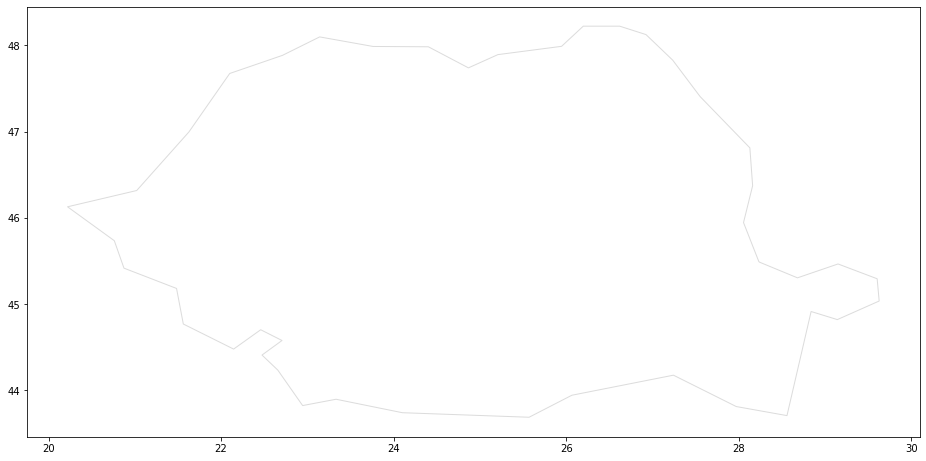

In [422]:
ro_bound.plot(figsize=(16,16),color='none', edgecolor='gainsboro', zorder=3)

In [424]:
data_geo = gdf.read_file('romania-counties.json')
  
# calculating total number of incidents per district
data = df['total_dead']
data.to_json('total_dead.json')
data= data.reset_index()
data.columns = ['county', 'total_dead']
  
# creation of the choropleth
map1 = folium.Map(location=[45.988706, 24.886986], zoom_start=12)
map1.geo_json(geo_path = data_geo, 
              data_out = 'total_dead.json', 
              data = df,
              columns = ['county', 'total_dead'],
              key_on = 'feature.properties.county',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of incidents per district')
               
display(map1)

AttributeError: 'Map' object has no attribute 'geo_json'